Done.
Starting from 521!!!
1/10 seconds
2/10 seconds
3/10 seconds
Max Depth: 1.0
Min Depth: 0.0
Average Depth: 0.2169902351052562
[Warning] Nan Detected!! Can Not Save IMAGE...
Max Depth: 1.0
Min Depth: 0.0
Average Depth: 0.7965474973366304
[Info] SAVED IMAGE


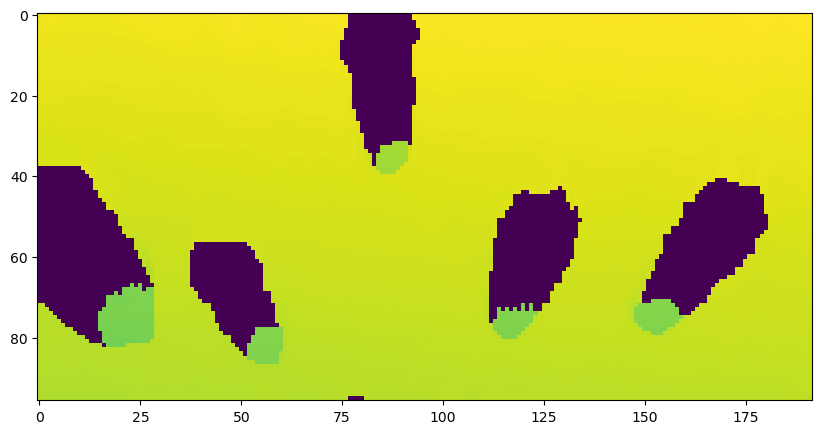

In [5]:
import sys 
sys.path.append("..")
sys.path.append("realsense")

import cv2 
from get_rostopic import RealsenseD435i
import numpy as np 
import rospy 
import matplotlib.pyplot as plt 
from utils.utils_pcl import ros_to_pcl, ros_to_numpy, XYZRGB_to_XYZ
from utils.utils_pointcloud import * 
import time 
print("Done.")

sys.path.append("realsense")
from pathlib import Path
dir_path = Path('/home/sangbeom/camera-usage/realsense/demo/realworld_data/npy')

steps=[]
for path in dir_path.iterdir():
    if "realworld" in path.stem:
        step = str.split(path.stem,"_")[1]
        steps.append(int(step))

if steps: start_count = max(steps)
else: start_count = 0
print("Starting from {}!!!".format(start_count))
rospy.init_node('Realsense')

if __name__ =="__main__":
    mode     = "depth"
    count    = start_count
    while count<522:
        count+=1

        for i in range(3):
            time.sleep(1)
            print("{}/10 seconds".format(i+1))

        camera   = RealsenseD435i(mode=mode)
        name = "realworld_{}".format(count)
        if mode=="depth":
            while True:
                fail = save_depth_img(msg_depth = camera.depth_image, name = name) 
                if not fail: 
                    break 
        else: 
            save_pc(msg_pc=camera.point_cloud, name=name)